<a href="https://colab.research.google.com/github/daotrananhtuan09102002/BinarySearchTREE/blob/master/blur_license_plate_notebook_YOLOv4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: 
* Truy cập đường dẫn sau: https://drive.google.com/drive/folders/1gN3Nypu9uWk_6pFy3JOlT9gX-SUf9ILd?usp=sharing 
* Thêm lối tắt của thư mục trên vào mục "drive của tôi" (mydrive)
    * Bước 1:
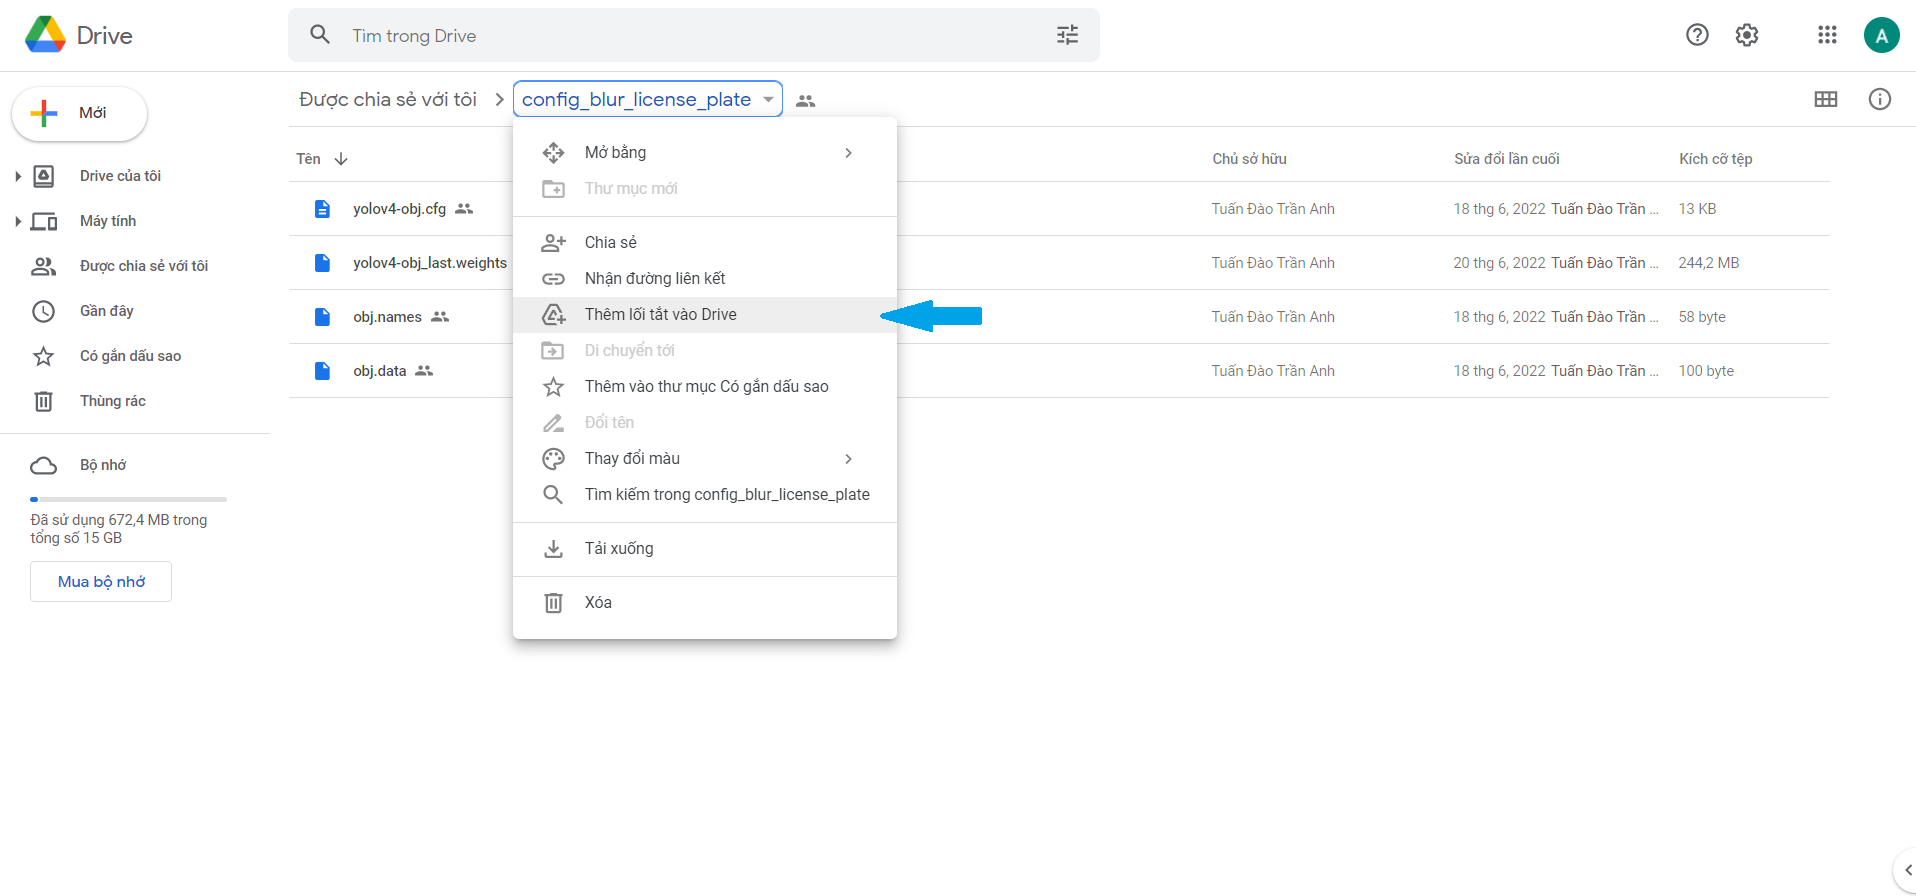
    * Bước 2: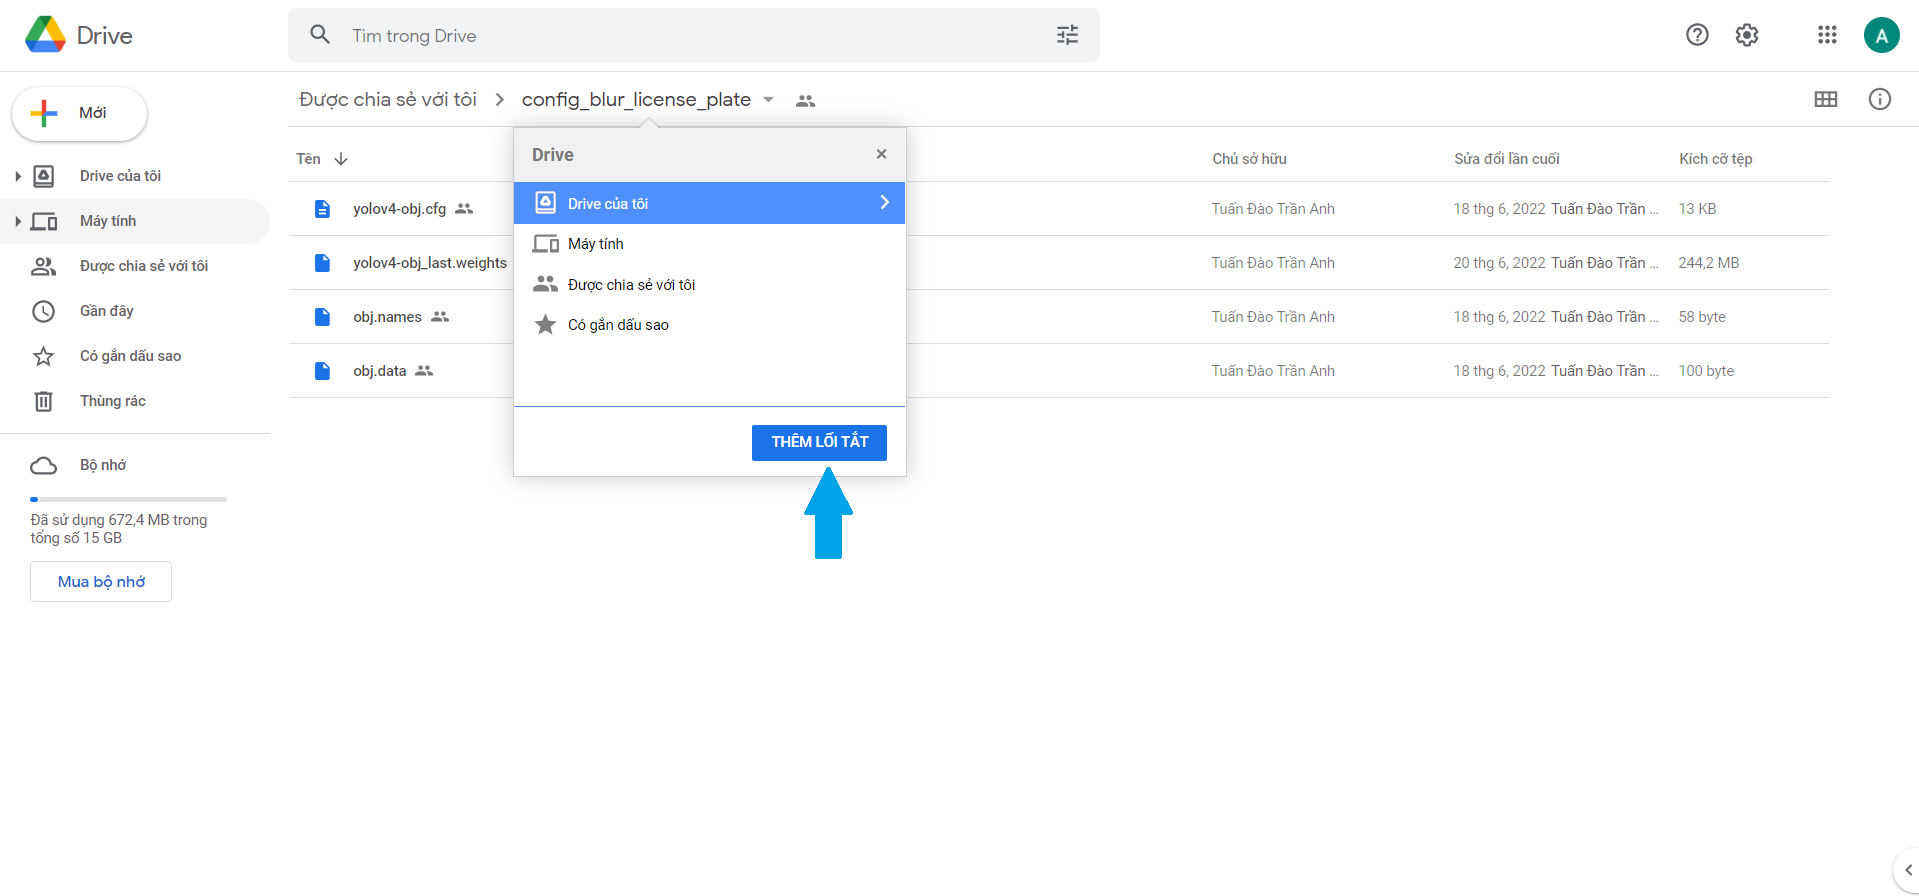


# Step 2: Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Git clone project from github

## Project của nhóm

In [ ]:
!git clone https://github.com/Zrmikstri/CS114.M21.KHCL.N07

Cloning into 'CS114.M21.KHCL.N07'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 48 (delta 16), reused 23 (delta 5), pack-reused 0
Unpacking objects: 100% (48/48), done.


## Project của model yolov4 darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet 

Cloning into 'darknet'...
remote: Enumerating objects: 15424, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15424 (delta 0), reused 1 (delta 0), pack-reused 15423
Receiving objects: 100% (15424/15424), 14.05 MiB | 23.93 MiB/s, done.
Resolving deltas: 100% (10364/10364), done.


# Step 4: Config file darknet and make darknet to run

In [ ]:
%cd /content/darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


* Chờ khoảng 70s để chạy xong dòng lệnh bên dưới. Không cần quan tâm đến các cảnh báo trong output của cell

In [ ]:
!make

# Step 5: Copy weight and config file to darknet

* Copy các file cần thiết trong thư mục đã được chia sẻ ở trong drive, hãy đảm bảo rằng thư mục 'config_blur_license_data' nằm đúng đường dẫn như bên dưới, nếu không hãy chỉnh lại đường dẫn cho phù hợp

In [ ]:
!cp /content/drive/MyDrive/config_blur_license_plate/obj.data /content/darknet/data
!cp /content/drive/MyDrive/config_blur_license_plate/obj.names /content/darknet/data
!cp /content/drive/MyDrive/config_blur_license_plate/yolov4-obj.cfg /content/darknet/cfg
!cp /content/drive/MyDrive/config_blur_license_plate/yolov4-obj_last.weights /content/darknet/backup

# Step 6: Find license plate location

* Hãy thay đường dẫn sau '-dont_show' và trước '-i' thành đường dẫn video mà bạn muốn làm mở biển số, hãy đảm bảo đường dẫn bắt đầu từ thư mục /content/

In [ ]:
%%capture cap
!./darknet detector demo data/obj.data cfg/yolov4-obj.cfg backup/yolov4-obj_last.weights -dont_show /content/drive/MyDrive/VID_20220609_163429_670.mp4 -i 0 -out_filename /content/demo.mp4 -ext_output -thresh 0.5

* Sau khi chạy lệnh bên trên thì video output thu được là demo.mp4 có thể copy file này vào ggdrive hoặc đơn giản là thay đổi đường dẫn sau '-out_filename'. Video này cho biết loại biển số và vị trí của nó trong 1 khung hình.

* Lưu các vị trí của biển số trong video thành file output.txt 
* File có nội dung giống như thế này: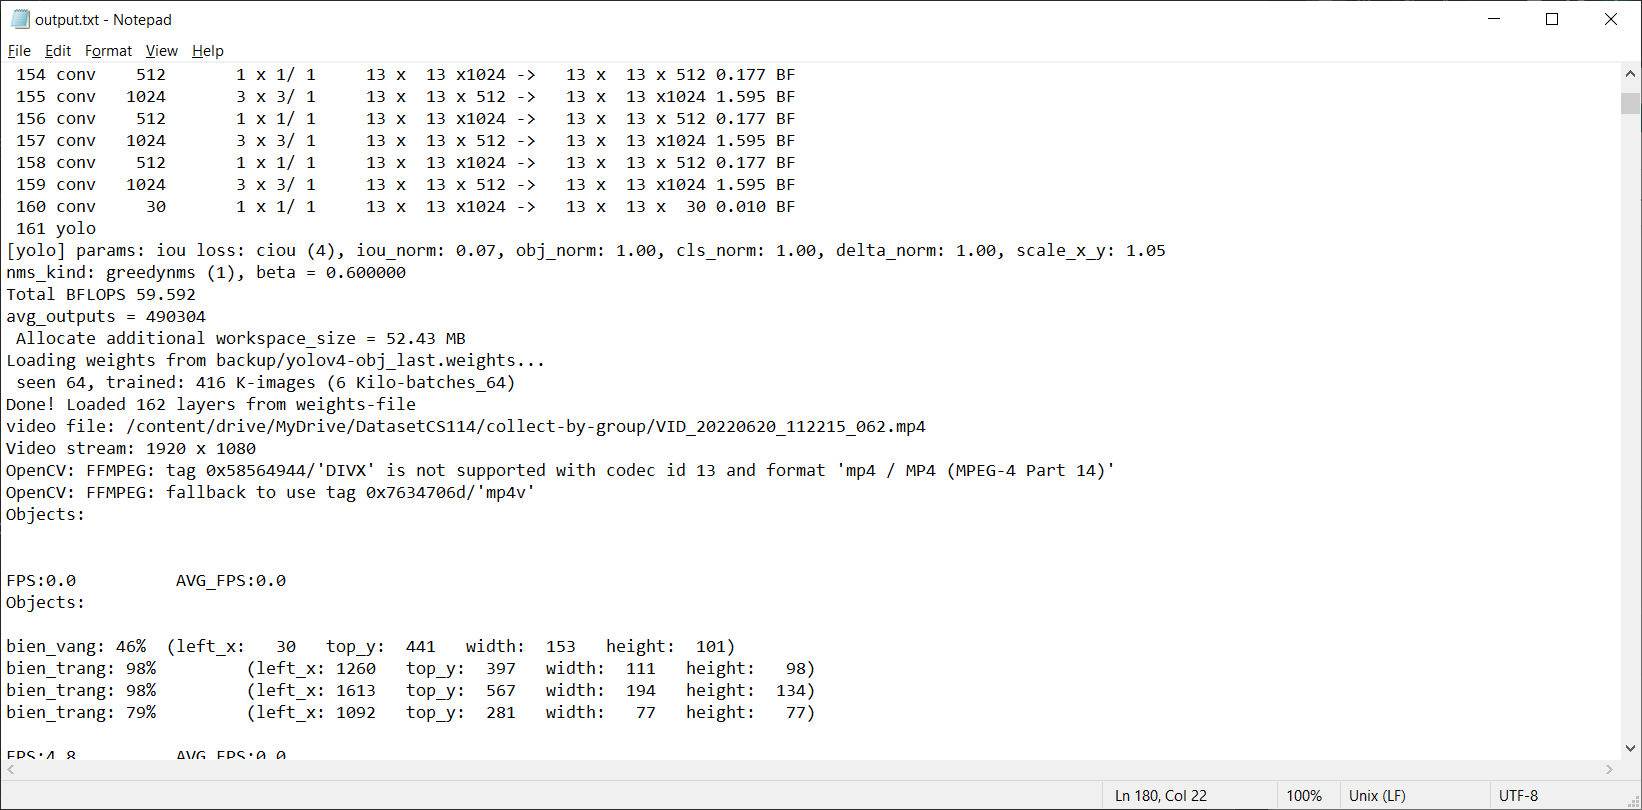

In [ ]:
f = open("/content/output.txt", "w") 
print(cap, file=f)
f.close()

* Chuyển đổi nội dung file output.txt thành file output.csv để dễ dàng trong việc làm mờ biển số bằng thư viện OpenCV.

In [ ]:
!python /content/CS114.M21.KHCL.N07/blur_license_plate/read_text.py

     Frame  ... Height
0        1  ...    NaN
1        2  ...     58
2        2  ...     38
3        3  ...     60
4        3  ...     37
...    ...  ...    ...
2747  1844  ...     90
2748  1845  ...    127
2749  1845  ...     87
2750  1846  ...    127
2751  1846  ...    106

[2752 rows x 5 columns]


# Step 7: Blur license plate and get video output

* Chạy lệnh bên dưới để nhận được video làm mờ biển số xe, link video cần làm mờ nằm sau '--input_vid_path'. Output là file output.avi

In [ ]:
!python /content/CS114.M21.KHCL.N07/blur_license_plate/main.py --input_vid_path /content/drive/MyDrive/VID_20220609_163429_670.mp4

FPS: 30	 1920x1080
Done


* Có thể download output.avi hoặc sử dụng lệnh sau để copy vào ggdrive

In [ ]:
!cp /content/output.avi /content/drive/MyDrive